In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

df.head()

X = StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [10]:
def euclidean(a, b):
    return np.linalg.norm(a - b)

def centroid(C):
    return np.mean(C, axis=0)

In [11]:
def cluster_distance(A, B, linkage="single"):
    if linkage == "single":
        return np.min([euclidean(a, b) for a in A for b in B])

    elif linkage == "complete":
        return np.max([euclidean(a, b) for a in A for b in B])

    elif linkage == "average":
        dists = [euclidean(a, b) for a in A for b in B]
        return np.mean(dists)

    elif linkage == "ward":
        # Ward distance = variance increase from merging clusters
        nA, nB = len(A), len(B)
        muA, muB = centroid(A), centroid(B)
        return (nA * nB) / (nA + nB) * np.sum((muA - muB)**2)

    else:
        raise ValueError("Unknown linkage")

In [12]:
def hierarchical_clustering(X, k=3, linkage="single"):
    # Step 1: start with each point as its own cluster
    clusters = [[x] for x in X]

    # Step 2: repeat until desired #clusters
    while len(clusters) > k:
        # Find closest pair of clusters
        min_dist = float("inf")
        to_merge = (None, None)

        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                dist = cluster_distance(clusters[i], clusters[j], linkage)
                if dist < min_dist:
                    min_dist = dist
                    to_merge = (i, j)

        i, j = to_merge

        # Step 3: merge them
        merged = clusters[i] + clusters[j]

        # Remove old clusters
        new_clusters = []
        for idx, c in enumerate(clusters):
            if idx not in (i, j):
                new_clusters.append(c)
        # Add new merged cluster
        new_clusters.append(merged)

        clusters = new_clusters

    return clusters


In [13]:
# Use just 2D PCA points for simplicity
X_small = X_2d.copy()

clusters = hierarchical_clustering(X_small, k=3, linkage="single")

for idx, c in enumerate(clusters):
    print(f"Cluster {idx}: {len(c)} points")

Cluster 0: 1 points
Cluster 1: 1 points
Cluster 2: 438 points


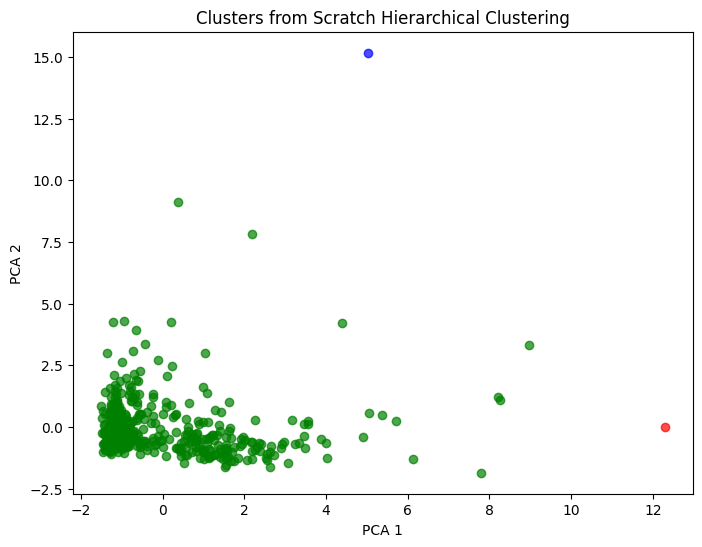

In [14]:
colors = ["red", "blue", "green", "purple", "orange", "black"]

plt.figure(figsize=(8,6))

for idx, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:,0], cluster[:,1], color=colors[idx % len(colors)], alpha=0.7)

plt.title("Clusters from Scratch Hierarchical Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [15]:
# Use just 2D PCA points for simplicity
X_small = X_2d.copy()

clusters = hierarchical_clustering(X_small, k=3, linkage="ward")

for idx, c in enumerate(clusters):
    print(f"Cluster {idx}: {len(c)} points")

Cluster 0: 136 points
Cluster 1: 290 points
Cluster 2: 14 points


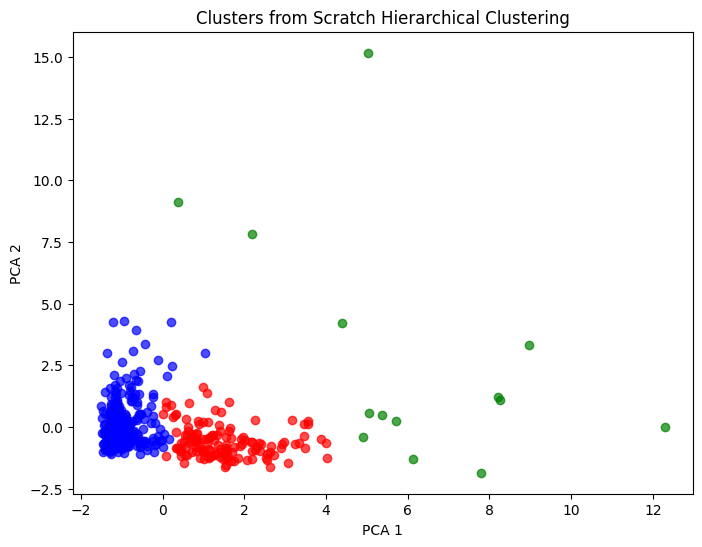

In [16]:
import matplotlib.pyplot as plt

colors = ["red", "blue", "green", "purple", "orange", "black"]

plt.figure(figsize=(8,6))

for idx, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:,0], cluster[:,1], color=colors[idx % len(colors)], alpha=0.7)

plt.title("Clusters from Scratch Hierarchical Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()